In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
from scipy.stats import skew

In [88]:
deliverydata1 = pd.read_csv("delivery_time.csv")

# Exploratory Data Analysis

In [3]:
deliverydata1.shape

(21, 2)

In [89]:
deliverydata1.head(3)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6


In [90]:
deliverydata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [91]:
deliverydata1.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [92]:
data = deliverydata1.rename(columns={'Delivery Time':'DT','Sorting Time':'ST'}, inplace=False)

In [8]:
data

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [10]:
print(skew(data.DT))

0.326702631656106


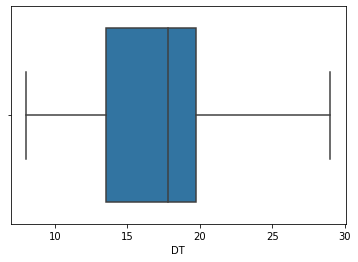

In [11]:
sns.boxplot(data['DT'], orient = 'h')

- The data for Delivery time is skewed left.
- All the observations lies in the intervals of approximately 13 to 20
- We can say that the median delivery time is around 18-19.

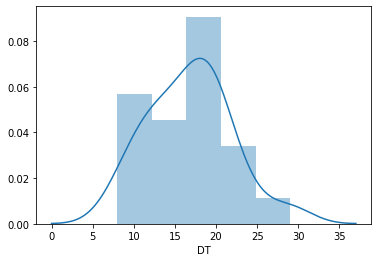

In [12]:
sns.distplot(data['DT'])

- The distribution of Delivery Time data is slightly more on the left tail of the curve

In [13]:
print(skew(data.ST))

0.043680994983108075


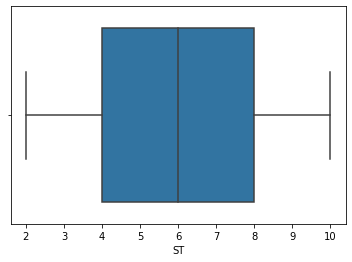

In [14]:
sns.boxplot(data['ST'], orient='h')

- The onservations for Sorting Time lies nearly between 4 to 8.
- There are approximately same no. of observatios falling under first and third quartile of bosplot. It means the Sorting Time data is symmetric and skewed.
- The median sorting time is approximately around 6.

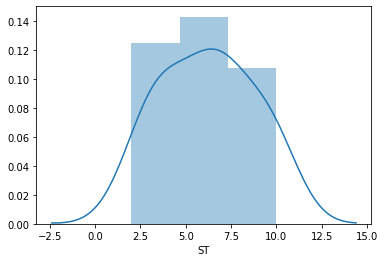

In [15]:
sns.distplot(data['ST'])

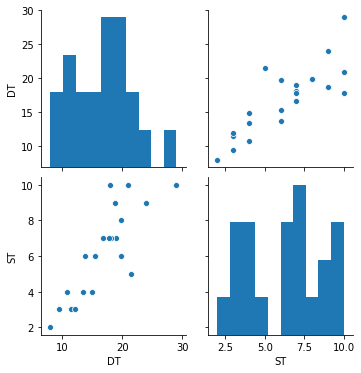

In [16]:
sns.pairplot(data)

- There's positive relation between Delivery Time and Sorting Time.

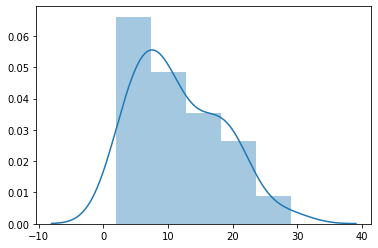

In [17]:
sns.distplot(data)

- Data distribution is not normal for this dataset
- We can see that most of the data is distributed towards the right tail of distplot

In [18]:
data.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


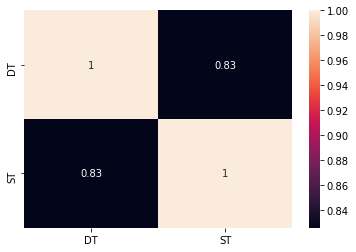

In [19]:
sns.heatmap(data.corr(), annot=True)

- We can see there's a strong positive relation between Delivery Time and Sorting Time. 

Text(0, 0.5, 'Sorting Time')

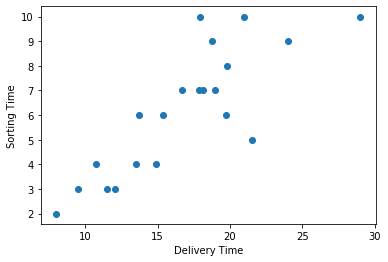

In [20]:
plt.scatter(data['DT'], data['ST'])
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")

- There's a pattern in Delivery Time and Sorting Time which shows a they have a positive relation. 

## Model Building 

In [21]:
data1 = data.copy()

In [22]:
data1.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### Model 1 

- Linear Model

In [23]:
model1 = sm.ols('ST~DT', data=data1).fit()
model1

In [24]:
model1.params

Intercept   -0.756673
DT           0.413744
dtype: float64

In [25]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           3.98e-06
Time:                        14:38:19   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7567      1.134     -0.667      0.513      -3.130       1.617
DT             0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

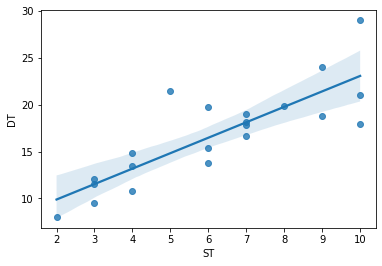

In [26]:
sns.regplot(x="ST", y="DT", data=data1);

In [27]:
pred = model1.predict(data1.iloc[:,0])
pred

0      7.931943
1      4.828866
2      7.414763
3      9.173174
4     11.241892
5      5.594291
6      7.104456
7      3.173891
8      6.649338
9      7.001020
10     7.447863
11     3.691071
12     6.144570
13     4.001378
14     4.220662
15     5.399832
16     4.932302
17     6.736224
18     2.553276
19     6.620376
20     8.138815
dtype: float64

In [28]:
pd.set_option("display.max_rows", 21) 
pred

0      7.931943
1      4.828866
2      7.414763
3      9.173174
4     11.241892
5      5.594291
6      7.104456
7      3.173891
8      6.649338
9      7.001020
10     7.447863
11     3.691071
12     6.144570
13     4.001378
14     4.220662
15     5.399832
16     4.932302
17     6.736224
18     2.553276
19     6.620376
20     8.138815
dtype: float64

Text(0, 0.5, 'Actual')

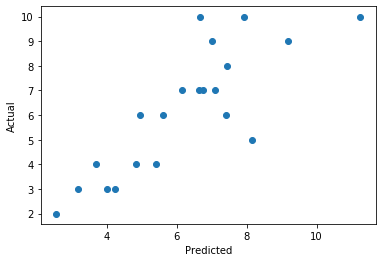

In [29]:
plt.scatter(x=pred,y=data1.ST)
plt.xlabel("Predicted")
plt.ylabel("Actual")

- rmse = sq([mean(AV-PV)^2])
---
- The less value of RMSE, The better is model. 

In [30]:
rmse_model1 = np.sqrt(np.mean((np.array(data1['ST'])-np.array(pred))**2))
rmse_model1 

1.3983430567957227

In [31]:
model1.resid
model1.resid_pearson

array([ 1.40674689, -0.56381619, -0.9623592 , -0.11779731, -0.8447675 ,
        0.27597371, -0.07105342, -0.1182853 ,  2.27920872,  1.35975901,
        0.37557826,  0.21014188,  0.58188575, -0.6811639 , -0.83032673,
       -0.95220243,  0.72627659,  0.17942755, -0.37635266,  0.25823056,
       -2.13510428])

Text(0, 0.5, 'Standardized Residual')

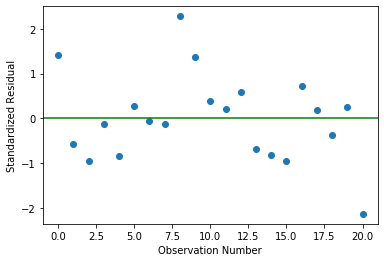

In [32]:
plt.plot(model1.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

In [33]:
pred.corr(data1['ST'])

0.8259972607955326

Text(0, 0.5, 'ST')

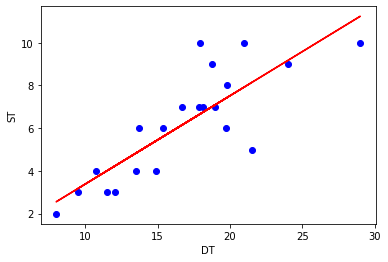

In [34]:
plt.scatter(x=data1['DT'],y=data1['ST'],color='blue')
plt.plot(data1.DT,pred,color='red')
plt.xlabel('DT')
plt.ylabel('ST')

In [35]:
print('R-Squared:',model1.rsquared, '\nRMSE:', rmse_model1)

R-Squared: 0.6822714748417231 
RMSE: 1.3983430567957227


### Model 2
---
- Log Model 

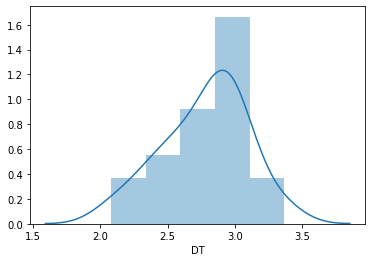

In [36]:
DT_log = np.log(data1['DT'])
sns.distplot(DT_log)

In [37]:
model2 = sm.ols('ST ~ np.log(DT)', data = data1).fit()
model2

In [38]:
model2.params

Intercept    -12.499233
np.log(DT)     6.735548
dtype: float64

In [39]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           1.59e-06
Time:                        14:38:25   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(DT)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
pred2 = model2.predict(data1['DT'])
pred2

0      8.007296
1      5.031310
2      7.593942
3      8.906703
4     10.181351
5      5.896328
6      7.333179
7      2.664452
8      6.931482
9      7.243965
10     7.621170
11     3.497060
12     6.456018
13     3.951314
14     4.254794
15     5.686869
16     5.154901
17     7.010043
18     1.506947
19     6.905090
20     8.165786
dtype: float64

In [41]:
model2.resid_pearson

array([ 1.42113829, -0.73549981, -1.13675271,  0.06653685, -0.1293345 ,
        0.07393595, -0.23761321,  0.23930282,  2.18837683,  1.25235279,
        0.27017028,  0.35868204,  0.38795221, -0.67844924, -0.89488241,
       -1.2030258 ,  0.60269965, -0.00716213,  0.35163128,  0.06768673,
       -2.25774594])

Text(0, 0.5, 'Standardized Residual')

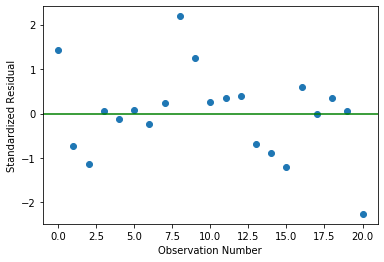

In [42]:
plt.plot(model2.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

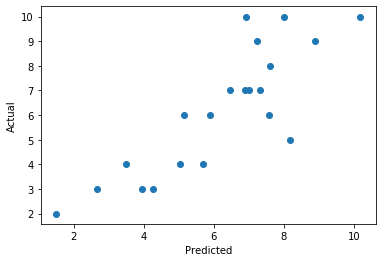

In [43]:
plt.scatter(x=pred2,y=data1.ST)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [44]:
pred2.corr(data1.ST)

0.8431772637224146

In [45]:
rmse_model2 = np.sqrt(np.mean((np.array(data1.ST)- np.array(pred2))**2))
rmse_model2

1.3337477286899515

In [46]:
print('R-Squared:',model2.rsquared, '\nRMSE:', rmse_model2)

R-Squared: 0.7109478980584186 
RMSE: 1.3337477286899515


Text(0, 0.5, 'ST')

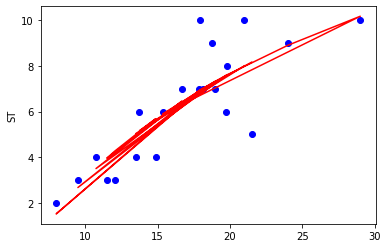

In [47]:
plt.scatter(x=data1.DT, y=data1.ST, color='blue')
plt.plot(data1.DT, pred2, color='red')
plt.ylabel('ST')

### Model 3
---
- Exponential Model 

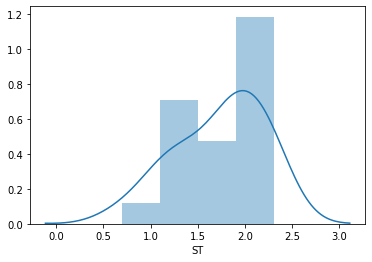

In [48]:
ST_log= np.log(data1.ST)
sns.distplot(ST_log)

In [49]:
model3 =  sm.ols("np.log(ST)~DT", data=data1).fit()
model3

In [50]:
model3.params

Intercept    0.437237
DT           0.076901
dtype: float64

In [51]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(ST)   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           2.64e-06
Time:                        14:38:28   Log-Likelihood:               -0.85600
No. Observations:                  21   AIC:                             5.712
Df Residuals:                      19   BIC:                             7.801
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4372      0.204      2.139      0.046       0.009       0.865
DT             0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
model3.resid_pearson

array([ 0.94514898, -0.33626175, -0.61992804, -0.32314918, -1.3766316 ,
        0.65705128,  0.17950335, -0.26108323,  1.84483896,  1.20051932,
        0.44256592,  0.46185032,  0.85281972, -0.84152838, -0.99534634,
       -0.7367689 ,  1.12140739,  0.43780144, -1.35597416,  0.51906376,
       -1.81589886])

Text(0, 0.5, 'Standardized Residual')

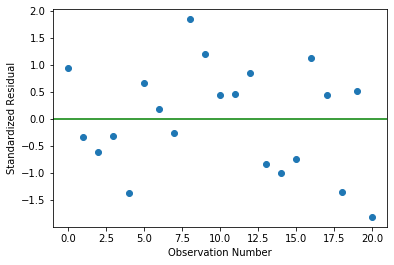

In [53]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

In [54]:
pred3_logs = model3.predict(data1.DT)
pred3_logs.iloc[:5]

0    2.052148
1    1.475394
2    1.956022
3    2.282850
4    2.667352
dtype: float64

In [55]:
pred3 = np.exp(pred3_logs)
pred3.iloc[0:5]

0     7.784605
1     4.372758
2     7.071145
3     9.804581
4    14.401789
dtype: float64

Text(0, 0.5, 'Actual Values')

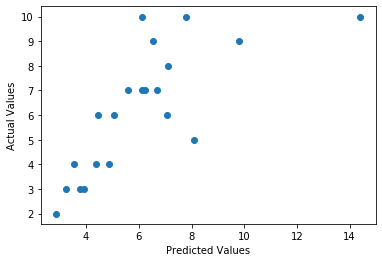

In [56]:
plt.scatter(y=data1.ST, x=pred3)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [57]:
pred3.corr(data1.ST)

0.7472768828616799

In [58]:
rmse_model3 = np.sqrt(np.mean((np.array(data1.ST)- np.array(pred3))**2))
rmse_model3

1.7921450016869793

In [59]:
print("R-Squared",model3.rsquared, "\nRMSE:", rmse_model3)

R-Squared 0.6954434611324223 
RMSE: 1.7921450016869793


Text(0, 0.5, 'ST')

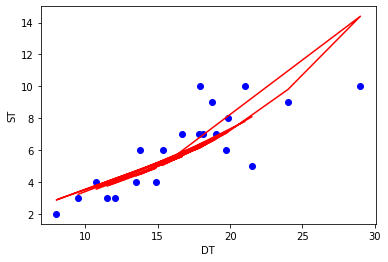

In [60]:
plt.scatter(x=data1.DT, y=data1.ST, color='Blue')
plt.plot(data1.DT, pred3, color='r')
plt.xlabel('DT')
plt.ylabel('ST')

### Model 4
---
- Quadratic model 

In [61]:
data1['DT_sq'] = data1.DT * data1.DT
data1.head(2)

,DT,ST,DT_sq
0,21.0,10,441.00
1,13.5,4,182.25


In [62]:
model4 = sm.ols('ST~DT+DT_sq', data=data1).fit()
model4

In [63]:
model4.params

Intercept   -4.640096
DT           0.894094
DT_sq       -0.013646
dtype: float64

In [64]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     22.72
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           1.19e-05
Time:                        14:38:32   Log-Likelihood:                -35.650
No. Observations:                  21   AIC:                             77.30
Df Residuals:                      18   BIC:                             80.43
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.6401      2.864     -1.620      0.123     -10.657       1.377
DT             0.8941      0.333      2.685      0.015       0.194       1.594
DT_sq         -0.0136      0.009     -1.469      0.159      -0.033       0.006
==============================================================================
Omnibus:                        1.829   Durbin-Watson:                   1.210
Prob(Omnibus):                  0.401   Jarque-Bera (JB):                0.513
Skew:                          -0.156   Prob(JB):                        0.774
Kurtosis:                       3.699   Cond. No.                     3.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
model4.resid_pearson

array([ 1.31870316, -0.66078524, -1.18780582,  0.02952088,  0.1316808 ,
        0.09188049, -0.29521813,  0.26468915,  2.10767088,  1.17242268,
        0.19361941,  0.42429725,  0.36666018, -0.58660873, -0.79938223,
       -1.15080698,  0.64900728, -0.05347629,  0.25272542,  0.02570952,
       -2.2945037 ])

Text(0, 0.5, 'Standardized Residual')

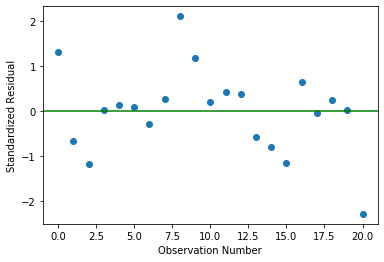

In [66]:
plt.plot(model4.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

In [67]:
pred4 = model3.predict(data1.DT)
pred4.iloc[:5]

0    2.052148
1    1.475394
2    1.956022
3    2.282850
4    2.667352
dtype: float64

Text(0, 0.5, 'Actual Values')

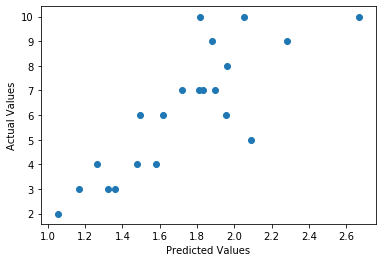

In [68]:
plt.scatter(y=data1.ST, x=pred4)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [69]:
pred4.corr(data1.ST)

0.8259972607955324

In [70]:
rmse_model4 = np.sqrt(np.mean((np.array(data1.ST)- np.array(pred4))**2))
rmse_model4

4.964666458679056

In [71]:
print("R-Squared",model4.rsquared, "\nRMSE:", rmse_model4)

R-Squared 0.7162727530109554 
RMSE: 4.964666458679056


Text(0, 0.5, 'ST')

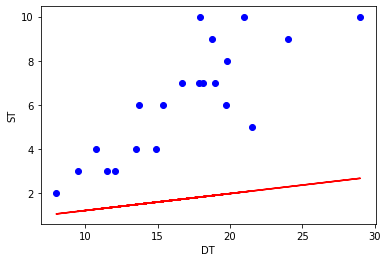

In [72]:
plt.scatter(x=data1.DT, y=data1.ST, color='Blue')
plt.plot(data1.DT, pred4, color='r')
plt.xlabel('DT')
plt.ylabel('ST')

- As the prediction line is not catching any data, it's the worst model not suitable for our dataset 

### Model 5
---
- Log-Quad Combination Model

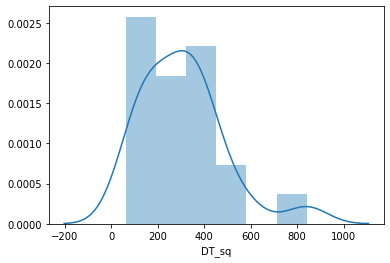

In [73]:
DT_sq = data1.DT * data1.DT
sns.distplot(data1.DT_sq)

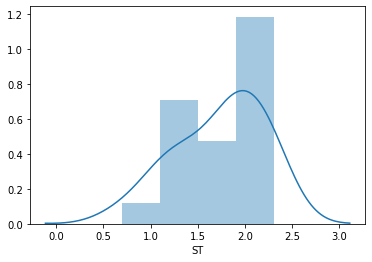

In [74]:
ST_log= np.log(data1.ST)
sns.distplot(ST_log)

In [75]:
model5 = sm.ols('np.log(ST)~DT+DT_sq', data=data1).fit()
model5

In [76]:
model4.params

Intercept   -4.640096
DT           0.894094
DT_sq       -0.013646
dtype: float64

In [77]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(ST)   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     34.62
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           6.77e-07
Time:                        14:38:36   Log-Likelihood:                 3.2337
No. Observations:                  21   AIC:                           -0.4673
Df Residuals:                      18   BIC:                             2.666
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7780      0.450     -1.730      0.101      -1.723       0.167
DT             0.2272      0.052      4.346      0.000       0.117       0.337
DT_sq         -0.0043      0.001     -2.928      0.009      -0.007      -0.001
==============================================================================
Omnibus:                        1.853   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                0.957
Skew:                          -0.521   Prob(JB):                        0.620
Kurtosis:                       3.100   Cond. No.                     3.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
model5.resid_pearson

array([ 0.85808801, -0.55724899, -1.12499417, -0.08143504,  0.36904657,
        0.39353665, -0.23033761,  0.46176795,  1.70343799,  0.96496061,
        0.13818532,  0.96052843,  0.54469546, -0.76595863, -1.06574894,
       -1.21026809,  1.12870339,  0.04272375, -0.32701069,  0.13487468,
       -2.33754663])

Text(0, 0.5, 'Standardized Residual')

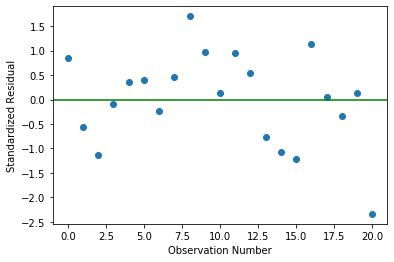

In [79]:
plt.plot(model5.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

In [80]:
pred5_logs = model5.predict(data1.DT)
pred5_logs.iloc[:5]

0    2.110323
1    1.511151
2    2.043824
3    2.215471
4    2.219897
dtype: float64

In [81]:
pred5 = np.exp(pred5_logs)  #since we took log of ST(dependet Variable)
pred5

0     8.250905
1     4.531944
2     7.720077
3     9.165723
4     9.206382
5     5.493602
6     7.370749
7     2.705128
8     6.827202
9     7.250110
10    7.756102
11    3.225473
12    6.195767
13    3.561679
14    3.809137
15    5.245998
16    4.659292
17    6.933311
18    2.152041
19    6.791625
20    8.441717
dtype: float64

Text(0, 0.5, 'Actual Values')

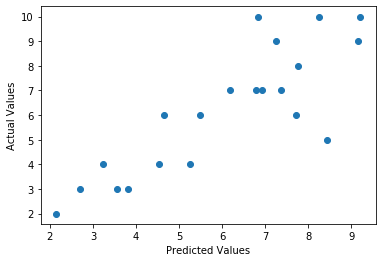

In [82]:
plt.scatter(y=data1.ST, x=pred5)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [83]:
rmse_model5 = np.sqrt(np.mean((np.array(data1.ST)- np.array(pred5))**2))
rmse_model5

1.347141980025572

Text(0, 0.5, 'ST')

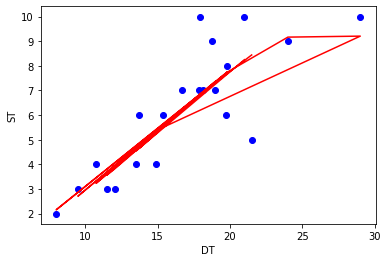

In [84]:
plt.scatter(x=data1.DT, y=data1.ST, color='Blue')
plt.plot(data1.DT, pred5, color='r')
plt.xlabel('DT')
plt.ylabel('ST')

### Model Evalution 

In [86]:
values = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad", "rmse_log-quad"]),
        "RMSE_Values":pd.Series([rmse_model1,rmse_model2,rmse_model3,rmse_model4, rmse_model5]),
        "Rsquare":pd.Series([model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared,model5.rsquared])}
table=pd.DataFrame(values)
table

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,1.398343,0.682271
1,rmse_log,1.333748,0.710948
2,rmse_exp,1.792145,0.695443
3,rmse_quad,4.964666,0.716273
4,rmse_log-quad,1.347142,0.793693


- So from above table, we can understand the logarithmic model is the best model whereas The quadratic model is the worst model